# Chap 7 합성곱 신경망

### 합성곱 신경망 (Convolutional Neural Network) : 이미지 인식과 음성 인식 등 다양한 곳에서 사용되는 인공 신경망

### 합성곱 (convolution) : 두 함수 중 하나를 반전, 이동시켜가며 나머지 함수와의 곱을 연이어 적분

## 7.1 전체구조

### CNN 역시 신경망과 같이 계층을 조합하여 생성가능
### 완전연결 : 본 신경망에서 인접하는 계층의 모든 뉴런과 결합하여 표현 (Affine 계층이라는 이름으로 구현)

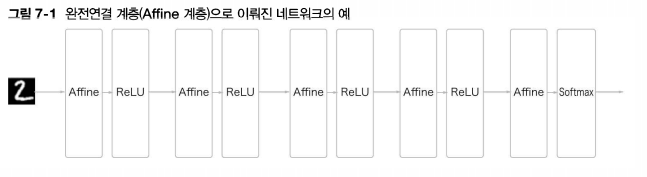

#### Affine -> ReLU 계층 완전연결 신경망

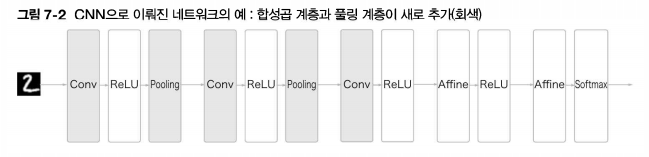

#### Conv -> ReLU -> (Pooling) 계층 CNN
#### ※ 출력층에 가까운 계층에서 Affine -> ReLU를 사용 가능하며 출력 계층에서 Affin -> Softmax를 사용

## 7.2 합성곱 계층

### 7.2.1 완전연결 계층의 문제점

#### 데이터의 형상이 무시됨

#### 데이터가 이미지일 경우, 보통 이미지는 가로, 세로, 채널 (색상)으로 구성된 3차원 데이터이지만 완전연결 계층에 입력시킬 땐 1차원 데이터로 평탄화해줘야 함
 
#### MNIST 데이터셋을 예로 들면, 형상이 (1, 28, 28)이었던 이미지를 (784, )로 바꿔 입력시킴

#### 이렇게 하면 데이터의 공간적 정보를 살릴 수 없음

#### → CNN은 데이터의 형상을 유지함

#### ※ 특징 맵 (feature map) : CNN에서 합성곱 계층의 입출력 데이터

### 7.2.2 합성곱 연산

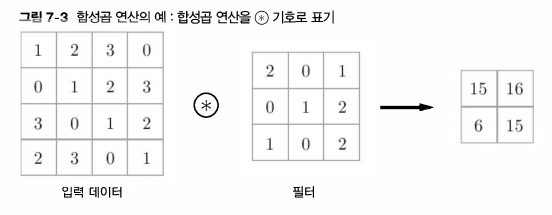

#### 데이터의 형상 = (높이, 너비) = (행 개수, 열 개수)

#### ex) 입력 : (4, 4) / 필터 (커널) : (3, 3) / 출력 : (2, 2)

#### ※ 단일 곱셈-누산 (fused multiply-add, FMA) : 대응하는 원소끼리 곱한 후 총합을 구하는 계산

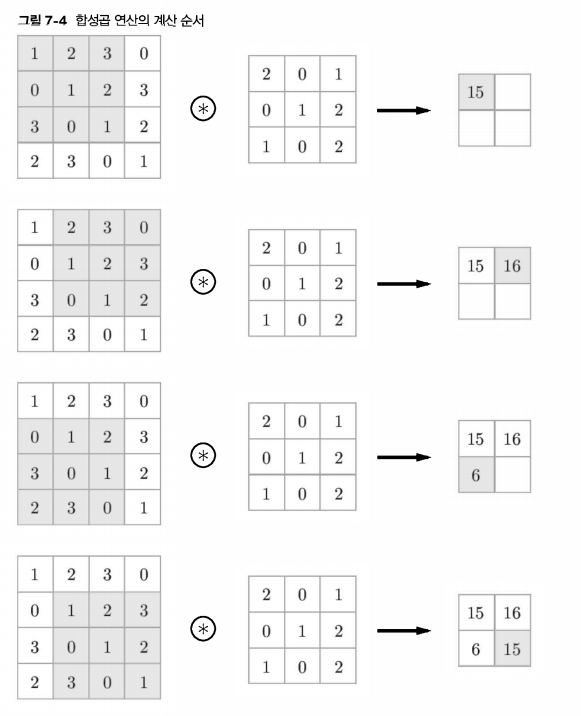

#### ※ 윈도우 (window) : 필터가 입력 데이터와 겹치는 부분 위 사진의 경우 첫 프레임의 짙은 부분

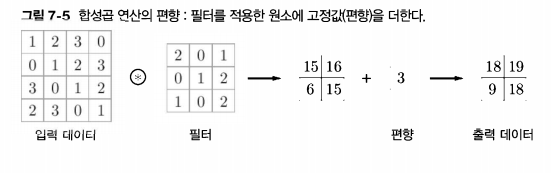

### 7.2.3 패딩

#### 패딩(padding) : 합성곱 연산 수행 전 입력데이터 주변을 특정 값(주로 0)으로 채우는 과정
#### ※ 합성곱 연산을 진행하면 데이터의 크기가 작아지는데 출력크기가 1이 되어 연산이 정지되는 상황을 방지하기 위해 적용

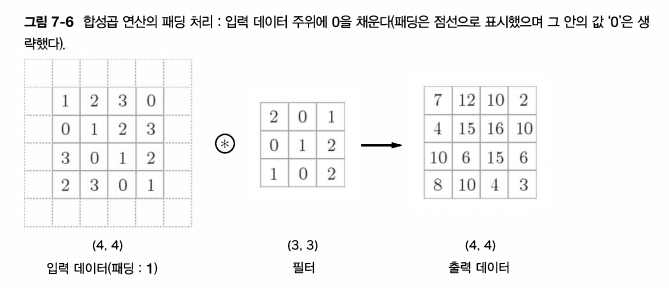

### 7.2.4 스트라이드

#### 스트라이드(stride) : 칠터를 적용하는 위치의 간격

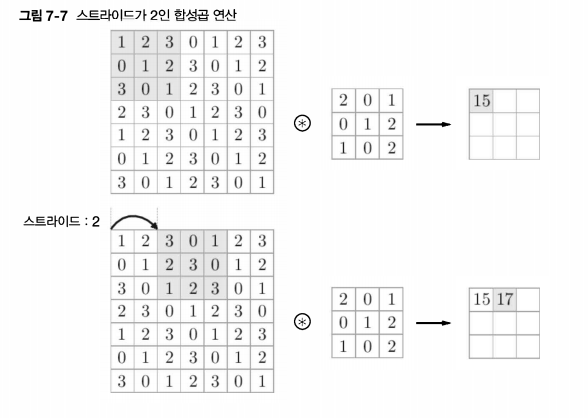

#### 입력 크기 : (H, W) / 필터 크기 : (FH, FW) / 출력 크기 : (OH, OW) / 패딩 : P / 스트라이드 : S

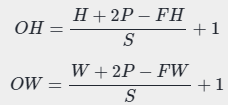

### 7.2.5 3차원 데이터의 합성곱 연산

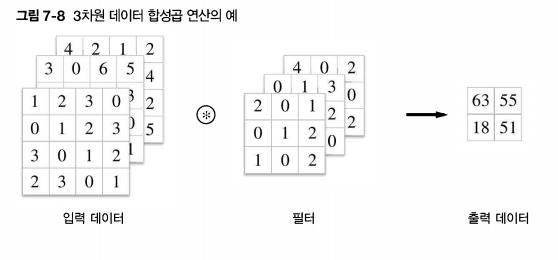

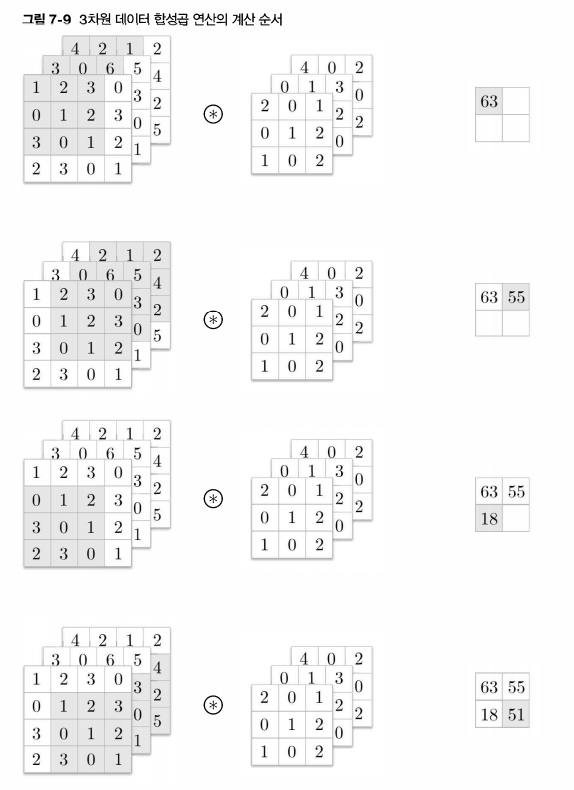

#### ※ 입력데이터 채널 수 = 필터의 채널 수

### 7.2.6 블록으로 생각하기

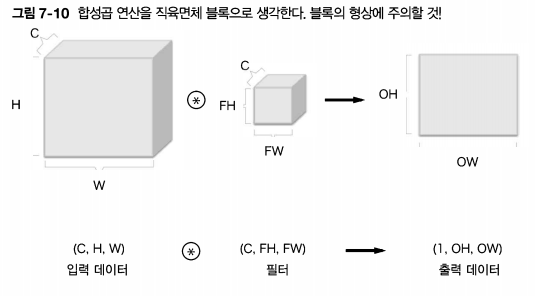

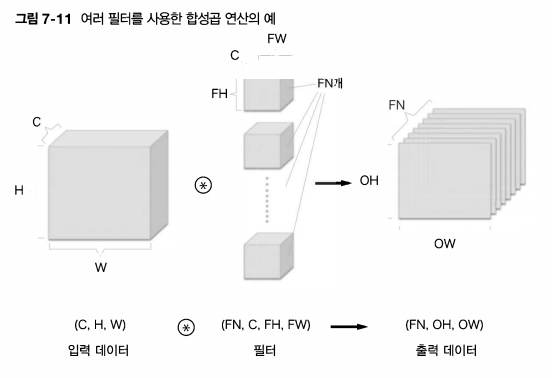

#### 필터를 FN개 적용 → 출력 맵의 채널도 FN개

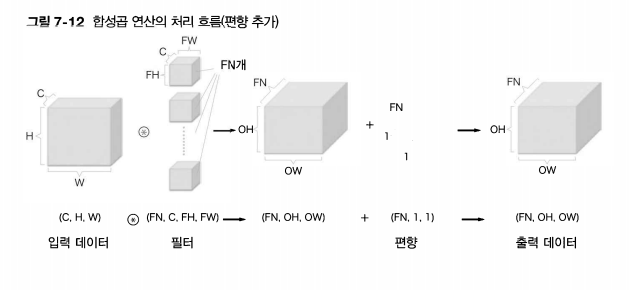

### 7.2.7 배치처리

#### 각 계층에 흐르는 데이터의 차원을 하나 늘려 4차원으로 저장 (데이터 수, 채널 수, 높이, 너비)

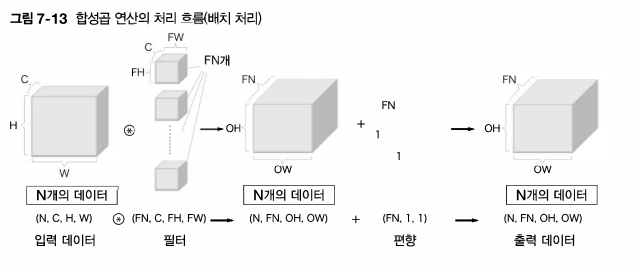

#### 신경망에 4차원 데이터가 하나 흐를 때마다 데이터 N개에 대한 합성곱 연산이 이뤄짐